In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def f(x):
    return 4.0 / (1 + x**2)

In [3]:
def gauss_legendre_integration(n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    x_values = 0.5 * (nodes + 1)
    fx_values = f(x_values)
    integral_approx = np.sum(weights * fx_values)
    integral_approx *= 0.5
    return integral_approx

In [4]:

pi_true = np.pi

M_values = range(1, 26)

errors_midpoint = []
errors_trapezoidal = []
errors_simpson = []
error_gauss_legendre = []

for m in M_values:
    n = 2**m
    x = np.linspace(0, 1, n+1)
    y = f(x)
    
    x_mid = (x[:-1] + x[1:]) / 2  
    midpoint_approx = (x[1] - x[0]) * np.sum(f(x_mid))
    errors_midpoint.append(abs(midpoint_approx - pi_true)/pi_true)

    trapezoidal_approx = integrate.trapezoid(y=y, x=x)
    errors_trapezoidal.append(abs(trapezoidal_approx - pi_true)/pi_true)
    
    simpson_approx = integrate.simpson(y=y, x=x)
    errors_simpson.append(abs(simpson_approx - pi_true)/pi_true)
    if 2 **m < 100:
        integral_gauss_legendre = gauss_legendre_integration(n)
        error_gauss_legendre.append(np.abs(np.pi - integral_gauss_legendre) / np.pi)
    else:
        error_gauss_legendre.append(np.nan)

[       2        4        8       16       32       64      128      256
      512     1024     2048     4096     8192    16384    32768    65536
   131072   262144   524288  1048576  2097152  4194304  8388608 16777216
 33554432]


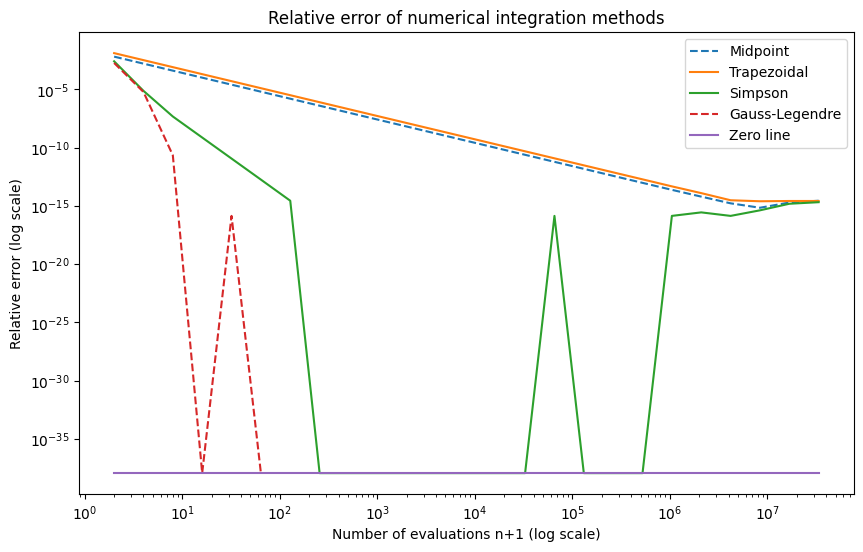

In [5]:
plt.figure(figsize=(10, 6))

plt.loglog(2**np.array(M_values), errors_midpoint, '--', label='Midpoint')
plt.loglog(2**np.array(M_values), errors_trapezoidal, '-', label='Trapezoidal')
plt.loglog(2**np.array(M_values), errors_simpson  + np.finfo(np.float32).tiny, '-', label='Simpson')
plt.loglog(2**np.array(M_values), error_gauss_legendre + np.finfo(np.float32).tiny, '--', label='Gauss-Legendre')
plt.loglog(2**np.array(M_values), [np.finfo(np.float32).tiny] * len(M_values), '-', label='Zero line')
print(2**np.array(M_values))
plt.xlabel('Number of evaluations n+1 (log scale)')
plt.ylabel('Relative error (log scale)')
plt.title('Relative error of numerical integration methods')
plt.legend()

plt.show()

In [6]:
np.argmin(errors_midpoint)
minimum = float('inf')
h1 = 1/2**np.argmin(errors_midpoint)
h2 = 1/2**np.argmin(errors_trapezoidal)
i = 0
for index, error in enumerate(errors_simpson):
    if error != 0:
        i = index
        minimum = min(minimum, error)

print(1/2**i)
h3 = 1/2**i
print('Midpoint rule: ', min(errors_midpoint))
print(h1)
print('Trrapezoidal rule: ', min(errors_trapezoidal))
print(h2)
print('Simpson', minimum)
print(h3)
h_min = 9.123695225180455e-09
error_of_h1 = np.abs(h_min - h1) / h_min
error_of_h2 = np.abs(h_min - h2) / h_min
error_of_h3 = np.abs(h_min - h3) / h_min
print(error_of_h1)
print(error_of_h2)
print(error_of_h3)

5.960464477539063e-08
Midpoint rule:  7.067899292141149e-16
2.384185791015625e-07
Trrapezoidal rule:  2.5444437451708133e-15
2.384185791015625e-07
Simpson 1.4135798584282297e-16
5.960464477539063e-08
25.13180002369565
25.13180002369565
5.5329500059239125


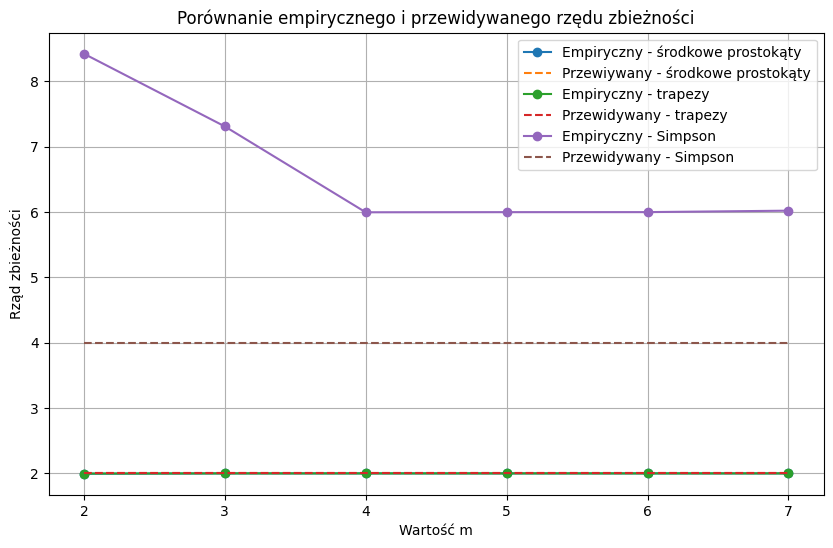

In [7]:
ran = 8
errors_midpoint = np.array(errors_midpoint)[:ran-1]
errors_trapezoidal = np.array(errors_trapezoidal)[:ran-1]
errors_simpson = np.array(errors_simpson)[:ran-1]
orders_midpoint = np.log(errors_midpoint[:-1] / errors_midpoint[1:]) / np.log(2)
orders_trapezoidal = np.log(errors_trapezoidal[:-1] / errors_trapezoidal[1:]) / np.log(2)
orders_simpson = np.log(errors_simpson[:-1] / errors_simpson[1:]) / np.log(2)

predicted_orders_midpoint = np.ones_like(orders_midpoint) * 2
predicted_orders_trapezoidal = np.ones_like(orders_trapezoidal) * 2
predicted_orders_simpson = np.ones_like(orders_simpson) * 4

plt.figure(figsize=(10, 6))
M_values = range(2, ran)
plt.plot(M_values, orders_midpoint, label='Empiryczny - środkowe prostokąty', marker='o')
plt.plot(M_values, predicted_orders_midpoint, linestyle='--', label='Przewiywany - środkowe prostokąty')
plt.plot(M_values, orders_trapezoidal, label='Empiryczny - trapezy', marker='o')
plt.plot(M_values, predicted_orders_trapezoidal, linestyle='--', label='Przewidywany - trapezy')
plt.plot(M_values, orders_simpson, label='Empiryczny - Simpson', marker='o')
plt.plot(M_values, predicted_orders_simpson, linestyle='--', label='Przewidywany - Simpson')
plt.xlabel('Wartość m')
plt.ylabel('Rząd zbieżności')
plt.title('Porównanie empirycznego i przewidywanego rzędu zbieżności')
plt.legend()
plt.grid(True)
plt.show()